In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## import libraries

In [ ]:
# import libraries

# for reading and visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# for pre processing
import nltk
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from gensim.parsing.preprocessing import remove_stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# for feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# for training models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import AdaBoostClassifier

# for Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## import dataset 

In [ ]:
# import dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
# shape of dataset

df.shape

(8675, 2)

In [ ]:
# basic information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
type(df['posts'][0])

str

## Visulization of dataset

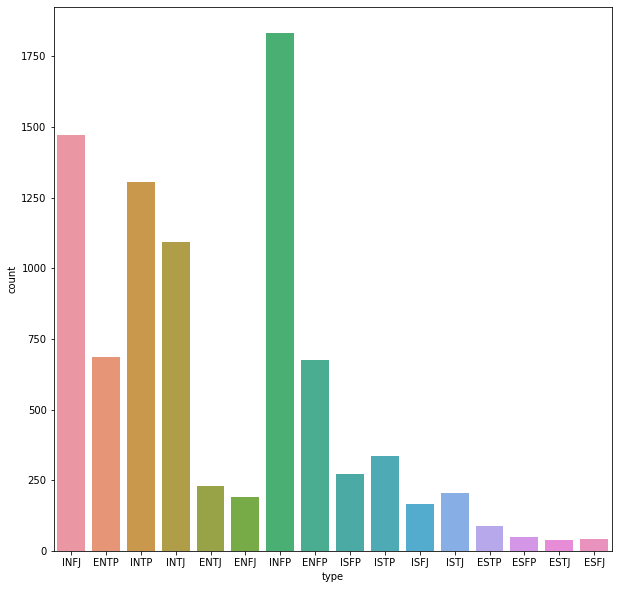

In [ ]:
# which type of personality has how much posts in dataframe

plt.figure(figsize=(10,10))
sns.countplot(x= 'type',data=df)

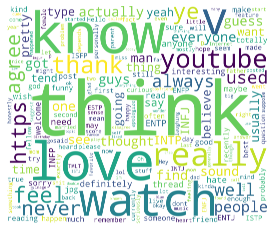

In [ ]:
# create word cloud for posts column

text = ' '.join(i.split()[1] for i in df['posts'])
word_cloud = WordCloud(width = 6000, height = 5000,collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Pre-processing on data

In [ ]:
# list of MBTI TYPES itself
mbti_types = [ 'infj','entp', 'intp', 'intj', 'entj' ,'enfj', 'infp', 'enfp', 'isfp', 'istp',
              'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj', 'ixfp']

In [ ]:
# remove urls from the text

def remove_urls(text):
  text = re.sub(r'http\S+','' , text)
  return text

# remove digits from the text

def remove_digits(text):
  text = re.sub(r'\d+','' ,text)
  return text

# split strings into words using word_tokenize

def tokens_of_words(text):
  text = word_tokenize(text)
  return text

# lemmatization on data

def lemmitize_data(text):
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(i,pos='v') for i in text]
  return text


In [ ]:
# pre-processing
# function for data cleaning

def cleaning_data(text):
  # replace 3 pipe to space
  text = [i.replace('|||',' ') for i in text]
  # convert into lowercase
  text = [i.lower() for i in text]
  # convert list to panda series
  text = pd.Series(text)
  # remove mbti types
  for i in mbti_types:
    text = text.str.replace(i,' ')
  # apply remove_urls function
  text = [remove_urls(i) for i in text]
  # apply remove_digits on text
  text = [remove_digits(i) for i in text]
  # convert list to panda series
  text = pd.Series(text)
  # remove puncuation from the text
  puncuation = list(string.punctuation)
  for i in puncuation:
    text = text.str.replace(i,' ')
  # remove stop words
  # from gensim.parsing.preprocessing import remove_stopwords
  text = [remove_stopwords(i) for i in text]
  # applying word_tokenize on text
  text = [tokens_of_words(i) for i in text]
  # lemmatization on data
  text = [lemmitize_data(i) for i in text]
  # convert list of words to str
  text = [' '.join(i) for i in text]
  # convert to pandas series
  text = pd.Series(text)
  # remove short words ( length between 1 to 2)
  shortword = re.compile(r'\W*\b\w{1,2}\b')
  text = [shortword.sub('', i) for i in text]
  #remove long words ( length between 14 to 40)
  longword = re.compile(r'\W*\b\w{14,40}\b')
  text = [longword.sub('', i) for i in text]
  return pd.Series(text)

In [ ]:
# apply function on the df['posts'] column
# returns clean df['posts'] column

df['posts'] = cleaning_data(df['posts'])

In [ ]:
# after cleaning

df

,type,posts
0,INFJ,moments sportscenter play prank life change ex...
1,ENTP,find lack post alarm sex bore position exampl...
2,INTP,good course know bless curse absolutely positi...
3,INTJ,dear enjoy conversation day esoteric gabbing n...
4,ENTJ,fire silly misconception approach logically ke...
...,...,...
8670,ISFP,think cat doms reason especially websites have...
8671,ENFP,thread exist someplace forum inspirers movies ...
8672,INTP,question things purple pill pick win lottery n...
8673,INFP,conflict right come want children honestly mat...


In [ ]:
'''
# extract csv

df.to_csv('without_mbti_types.csv', index=False)
!cp without_mbti_types.csv /content/drive/MyDrive
                                                

'''



## Visulization after cleaning

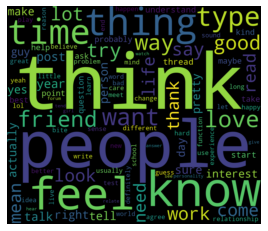

In [ ]:
text = (i.split() for i in df['posts'])
text = [' '.join(i) for i in text]
word_cloud = WordCloud(width = 1400, height = 1200,collocations = False, max_words=100, background_color = 'black').generate(str(text))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Feature engineering

In [ ]:
# split data into features and label
# features

x = df['posts']
x

0       moments sportscenter play prank life change ex...
1        find lack post alarm sex bore position exampl...
2       good course know bless curse absolutely positi...
3       dear enjoy conversation day esoteric gabbing n...
4       fire silly misconception approach logically ke...
                              ...                        
8670    think cat doms reason especially websites have...
8671    thread exist someplace forum inspirers movies ...
8672    question things purple pill pick win lottery n...
8673    conflict right come want children honestly mat...
8674    long change bite good like usually turn doctor...
Name: posts, Length: 8675, dtype: object

In [ ]:
# target

y = df['type']
y

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object

In [ ]:
# feature engineering
# label encoding

encoder = LabelEncoder()

y = encoder.fit_transform(y)
y

array([ 8,  3, 11, ..., 11,  9,  9])

In [ ]:
# vectorization
# use Tfidfvectorizer

tfidf = TfidfVectorizer(lowercase=False)

x = tfidf.fit_transform(x)

In [ ]:
'''
# save tfidf

import pickle

with open('tfidf_pkl','wb') as files:
  pickle.dump(x, files)
                                    '''

In [ ]:
print(x)

  (0, 48995)	0.02355938460696231
  (0, 67960)	0.02036475574207117
  (0, 3853)	0.04850308251577728
  (0, 17537)	0.09745596040619282
  (0, 78473)	0.01636816984261938
  (0, 13958)	0.0552677888304951
  (0, 44953)	0.06669557857908502
  (0, 52294)	0.0751034892964391
  (0, 24317)	0.06217752196909203
  (0, 7225)	0.02860633650900224
  (0, 55770)	0.046547621558790206
  (0, 7072)	0.021743943321970015
  (0, 66780)	0.03015881448447877
  (0, 1408)	0.02862931336583774
  (0, 81163)	0.022390774878899438
  (0, 67084)	0.028893956417190936
  (0, 57367)	0.044342463547605154
  (0, 24304)	0.04203638303228103
  (0, 1316)	0.0332538092509506
  (0, 31170)	0.02874476804965569
  (0, 47624)	0.02928368755489222
  (0, 62764)	0.02543638917448255
  (0, 51018)	0.02830653200539285
  (0, 1499)	0.06431372113371986
  (0, 81275)	0.0471406360106895
  :	:
  (8674, 32005)	0.028600431424593
  (8674, 53974)	0.0221163857093811
  (8674, 53649)	0.12530362235192774
  (8674, 22198)	0.044771643901718394
  (8674, 80155)	0.09856274564215

In [ ]:
x.shape

(8675, 82472)

In [ ]:
x= pd.DataFrame(x.toarray())
x

,0,1,2,3,4,5,6,7,8,9,...,82603,82604,82605,82606,82607,82608,82609,82610,82611,82612
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x[0].unique()

array([0.        , 0.06928574, 0.07004366, 0.10511346, 0.08110966,
       0.0555803 ])

## train test split

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6940, 82472) (1735, 82472) (6940,) (1735,)


In [ ]:
X_test = pd.DataFrame(X_test.toarray())
X_test

,0,1,2,3,4,5,6,7,8,9,...,82462,82463,82464,82465,82466,82467,82468,82469,82470,82471
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## train multiple models

###  train test split with 80:20 with MBTI TYPES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# train multiple model with default parameters

models = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, SVC, LogisticRegression]

for model in models:
  clf = model()
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('For', clf ,'acuuracy is',accuracy)

For KNeighborsClassifier() acuuracy is 0.3855907780979827
For DecisionTreeClassifier() acuuracy is 0.47146974063400576
For RandomForestClassifier() acuuracy is 0.4403458213256484
For XGBClassifier(objective='multi:softprob') acuuracy is 0.6801152737752162
For SVC() acuuracy is 0.6420749279538905
For LogisticRegression() acuuracy is 0.6593659942363113


In [ ]:
## adaboost

ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.40172910662824207

### train test split with 70:30 with MBTI TYPES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6940, 85821) (1735, 85821) (6940,) (1735,)


In [ ]:
# train multiple model with default parameters

models = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, SVC, LogisticRegression, AdaBoostClassifier]

for model in models:
  clf = model()
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('For', clf ,'acuuracy is',accuracy)

For KNeighborsClassifier() acuuracy is 0.39147137917787167
For DecisionTreeClassifier() acuuracy is 0.4882827506723012
For RandomForestClassifier() acuuracy is 0.43373031117940836
For XGBClassifier(objective='multi:softprob') acuuracy is 0.6876680752977334
For SVC() acuuracy is 0.6308106031502113
For LogisticRegression() acuuracy is 0.6600076834421821
For AdaBoostClassifier() acuuracy is 0.3918555512869766


### train test split with 70:30 without MBTI TYPES


In [ ]:
# train multiple model with default parameters

models = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, SVC, LogisticRegression]

for model in models:
  clf = model()
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('For', clf ,'acuuracy is',accuracy)

For KNeighborsClassifier() acuuracy is 0.19823280829811757
For DecisionTreeClassifier() acuuracy is 0.1736457933154053
For RandomForestClassifier() acuuracy is 0.27391471379177873
For XGBClassifier(objective='multi:softprob') acuuracy is 0.3446023818670764
For SVC() acuuracy is 0.36650019208605455
For LogisticRegression() acuuracy is 0.38148290434114485


### train test split with 80:20 WITHOUT MBTI TYPES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6940, 82472) (1735, 82472) (6940,) (1735,)


In [ ]:
# train multiple model with default parameters

models = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, SVC, LogisticRegression, AdaBoostClassifier]

for model in models:
  clf = model()
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('For', clf ,'acuuracy is',accuracy)

For KNeighborsClassifier() acuuracy is 0.1988472622478386
For DecisionTreeClassifier() acuuracy is 0.1809798270893372
For RandomForestClassifier() acuuracy is 0.2824207492795389
For XGBClassifier(objective='multi:softprob') acuuracy is 0.3573487031700288
For SVC() acuuracy is 0.3740634005763689
For LogisticRegression() acuuracy is 0.38962536023054756
For AdaBoostClassifier() acuuracy is 0.25936599423631124


## Hyper parameter tuning 

In [ ]:
# Hyper-parameter tuning of logistic regression

from sklearn.model_selection import RandomizedSearchCV

clf = LogisticRegression()

random_para = [{'penalty': ['l1', 'l2', 'elasticnet','none'],
                'solver': [ 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga'],
                'max_iter': [100, 200, 500, 1000 , 1400, 2500, 3000],
                'C': [100, 10, 1.0, 0.1, 0.01]}]

randomize = RandomizedSearchCV(estimator= clf,param_distributions= random_para, cv=5)

model = randomize.fit(X_train,y_train)

print(model.best_estimator_)

LogisticRegression(C=10, max_iter=2500, solver='liblinear')


In [ ]:
# LR train with best parameter

LR = LogisticRegression(C=10, max_iter=2500, solver='liblinear')

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy with best parameter is', accuracy*100)

accuracy with best parameter is 40.345821325648416


In [ ]:
'''
# save LR model

import pickle

with open('model_LR_pkl','wb') as files:
  pickle.dump(LR, files)


In [ ]:
# Hyper-parameter tuning of svm

svm = SVC()

parameters = [{'C': [0.01, 0.1, 1, 10, 100, 150, 200],
               'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
               'gamma': ['scale', 'auto']}]

svm_model = RandomizedSearchCV(estimator=svm, param_distributions= parameters , cv = 5 )

svm_model.fit(X_train,y_train)
best_est = svm_model.best_estimator_

print('Best parameters : ',best_est)

Best parameters :  SVC(C=10, kernel='sigmoid')


In [ ]:
# train with best parameter

svm = SVC(C=10, kernel='sigmoid')

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy with best parameter is', accuracy*100)

accuracy with best parameter is 36.945244956772335


In [ ]:
'''

# Hyper parameter tuning of XGboost

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


random_grid = {
    'n_estimators': [4,5,9,10,16,20,40,60,100,300],
    'learning_rate': [0.01,0.1,0.2,0.3,0.03,0.5,0.6,0.8,0.9,1],
    'max_depth':[3,5,7,10,15],
     'min_child_weight':[2,3,5,6,8,10],
     'gamma': [i/10.0 for i in range(0,5)]
}

XGB = XGBClassifier()
XGB_random = RandomizedSearchCV(estimator = XGB, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, n_jobs = -1)
XGB_random.fit(X_train, y_train)
print(XGB_random.best_estimator_)


                                          '''